In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from hydrophone_data_processing import load
from scipy import io


In [2]:
import glob
glob.glob('/media/sda/data/borehole/detections/')

['/media/sda/data/borehole/detections/']

<AxesSubplot:xlabel='time'>

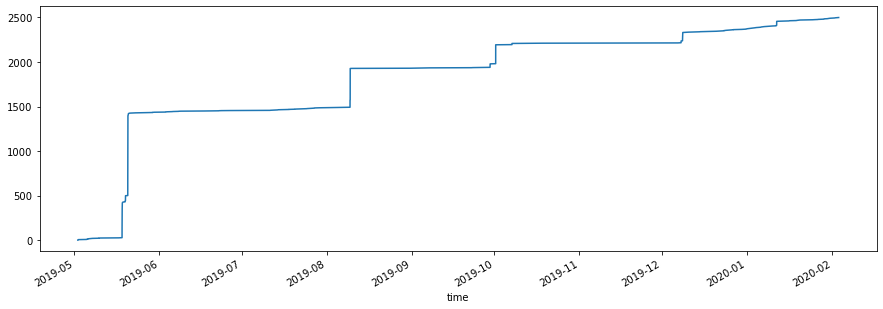

In [3]:
# import bubbles
bubbles = load.import_bubble_detections('/media/sda/data/borehole/detections/*.csv')
bubbles.ones.cumsum().plot(figsize=(15, 5))
# bubbles[bubbles.similarity>0.6].ones.cumsum().plot(figsize=(15, 5))

In [32]:
bubbles.reset_index(inplace=True)

In [39]:
bubbles.time.apply(lambda x: str(x).split('+')[0]).to_csv('bubbletimes.csv')

In [36]:
bubbles.time.to_csv('bubbletimes.csv')

In [4]:
bubbles.to_csv('bubble_BA1B.csv', index=True)

In [5]:
# import spectrogram


In [6]:
# specdatalocs[0:5]

In [7]:
specdatalocs = sorted(glob.glob('/media/sda/data/borehole/spectrograms/BA1B/phone_1/2019/*.mat'))
specdata2020locs = sorted(glob.glob('/media/sda/data/borehole/spectrograms/BA1B/phone_1/2020/*.mat'))

In [8]:
def load_data(datadir):
    """
    Loads data from matlab file
    """
    matdata = io.loadmat(datadir)
    keys = list(matdata.keys())
    datakey = keys[3]
    axiskey = keys[4]
    return matdata[axiskey], matdata[datakey]

In [9]:
# axis1, data1 = load_data(specdatalocs[0])
# axis2, data2 = load_data(specdatalocs[1])
# axis3, data3 = load_data(specdatalocs[2])

# np.hstack([data1, data2, data3])
allspecdata = np.hstack([load_data(dir)[1] for dir in specdatalocs])
allspecaxes = np.hstack([load_data(dir)[0] for dir in specdatalocs])

In [10]:
allspecdata2020 = np.hstack([load_data(dir)[1] for dir in specdata2020locs])

In [11]:
allspecdata = np.hstack([allspecdata, allspecdata2020])

In [12]:
(10*np.log10(allspecdata)).min()

-110.04397666258861

In [13]:
allspecdata.shape

(524289, 279)

In [14]:
allspecdata[0:][:2000]

array([[  6.19372552e-05,   7.09258342e-05,   7.39578529e-05, ...,
          4.25477645e-05,   1.41803434e-05,   4.45213507e-05],
       [  1.15941205e-04,   1.35238373e-04,   1.38078057e-04, ...,
          8.12145674e-05,   3.19076773e-05,   8.86925332e-05],
       [  8.26474771e-05,   9.34813239e-05,   9.35605480e-05, ...,
          5.84859309e-05,   2.99681835e-05,   6.59032636e-05],
       ..., 
       [  1.10351089e-05,   5.97866350e-06,   3.81649152e-06, ...,
          4.22743230e-06,   2.71885383e-06,   1.78767714e-06],
       [  1.06907612e-05,   6.46683146e-06,   3.79606306e-06, ...,
          4.07319564e-06,   2.89183779e-06,   1.53051846e-06],
       [  1.14237826e-05,   5.90386138e-06,   3.30155186e-06, ...,
          3.76369044e-06,   3.43482012e-06,   1.61808477e-06]])

In [15]:
allspecdata[0:][:2000].max()

0.12220233864505589

In [16]:
allspecaxes[:,0]

array([  0.00000000e+00,   9.53674316e-04,   1.90734863e-03, ...,
         4.99998093e+02,   4.99999046e+02,   5.00000000e+02])

In [18]:
# x

In [19]:
# xx, yy = np.meshgrid(x, y)

In [21]:
# C.max()

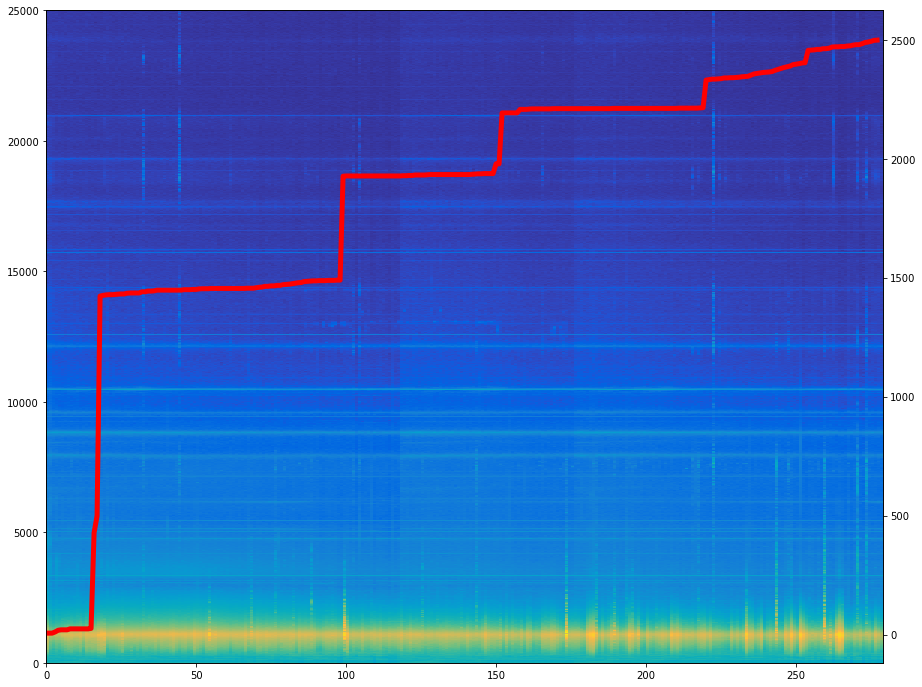

In [29]:
import matplotlib as mpl



fig, ax = plt.subplots(figsize=(15, 12))

cmap = mpl.cm.Spectral
norm = mpl.colors.Normalize(vmin=-80, vmax=-50)

# cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
#                                 norm=norm,
#                                 orientation='horizontal')
maxheight = 25000

x = np.linspace(0, allspecdata.shape[1], allspecdata.shape[1]+1)
# y = allspecaxes[:,0][:maxheight]
C = 10*np.log10(allspecdata[0:][:maxheight])
# C = allspecdata[0:][:maxheight]
# ax.pcolormesh(C, cmap='cool',)
# ax.pcolormesh(C, cmap=cmap, norm=norm,)
ax.pcolormesh(C, cmap=test_cm)

ax2 = ax.twinx()

y = bubbles.resample('1d').sum().cumsum().ones.values
# x = 

ax2.plot(x[:-2], y, color='red', linewidth=5)

In [ ]:
# x.shape

In [ ]:
# matdata = io.loadmat(specdatalocs[0])

In [ ]:
# x = matdata['f']
# y = matdata['PSDM_jd250']
# plt.plot(x, y)
# plt.yscale('log')

In [ ]:
# matdata

In [ ]:
# matdata = io.loadmat(specdatalocs[5])
# keys = list(matdata.keys())
# datakey = keys[3]
# axiskey = keys[4]

# data = matdata[datakey]
# axis = matdata[axiskey]

# plt.plot(axis, data)
# plt.yscale('log')

In [26]:
from matplotlib.colors import LinearSegmentedColormap

cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]

parula_map = LinearSegmentedColormap.from_list('parula', cm_data)
# For use of "viscm view"
test_cm = parula_map
